In [21]:
import os

import ele
import matplotlib.pyplot as plt
import numpy as np
import signac

from cmeutils.sampling import is_equilibrated, equil_sample
from cmeutils.structure import bond_distribution, angle_distribution, dihedral_distribution
from grits.coarsegrain import CG_System

In [3]:
project = signac.get_project("../training-runs/single-chains/")

In [4]:
project.detect_schema()

ProjectSchema(<len=13>)

# Check if single-chain simulations are equilibrated:

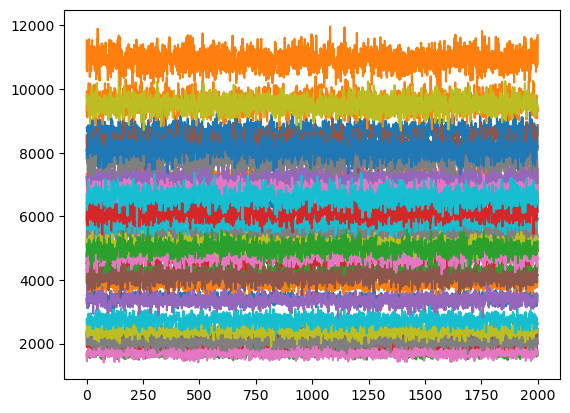

In [15]:
for job in project:
    data = np.genfromtxt(job.fn(f"log{job.doc.runs - 1}.txt"), names=True)
    pe = data["mdcomputeThermodynamicQuantitiespotential_energy"]
    plt.plot(pe[-2000:])

# Sweep over chain lengths:
- If we want to use single chain simulations to get target bond angle and dihedral distributions, does our choice in chain length matter?
- Does this depend on temperature?

ValueError: Angles A-A-A or A-A-A not found in  snap.angles.types. A_name, B_name, C_name must match the order as they appear in snap.angles.types.

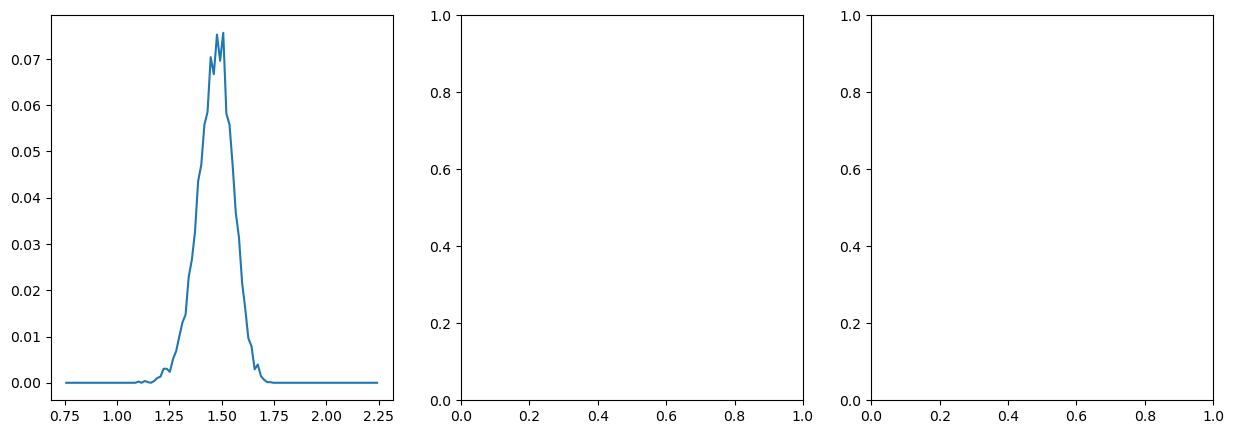

In [38]:
kT = 8.0
remove_charges = False
remove_hydrogens = False

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for chain_length, jobs in project.find_jobs(
    {"kT": kT, "remove_charges": remove_charges, "remove_hydrogens": remove_hydrogens}
).groupby("lengths"):
    for job in jobs:
        gsd_file = job.fn(f"cg-trajectory{job.doc.runs - 1}.gsd")
        # BONDS:
        bond_dist = bond_distribution(
            gsd_file=gsd_file,
            A_name="A",
            B_name="A",
            start=100,
            stop=-1,
            histogram=True,
            l_min=0.75,
            l_max=2.25
        )
        axs[0].plot(bond_dist[:,0], bond_dist[:,1], label=chain_length)\
        
        # ANGLES:
        angle_dist = angle_distribution(
            gsd_file=gsd_file,
            A_name="A",
            B_name="A",
            C_name="A",
            start=100,
            stop=-1,
            histogram=True,
            #l_min=0.5,
            #l_max=2.5
        )
        axs[1].plot(angle_dist[:,0], angle_dist[:,1], label=chain_length)

axs[0].legend(title="Chain Length")
axs[1].legend(title="Chain Length")

In [31]:
bond_dist[:,0]

array([0.02, 0.06, 0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42,
       0.46, 0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86,
       0.9 , 0.94, 0.98, 1.02, 1.06, 1.1 , 1.14, 1.18, 1.22, 1.26, 1.3 ,
       1.34, 1.38, 1.42, 1.46, 1.5 , 1.54, 1.58, 1.62, 1.66, 1.7 , 1.74,
       1.78, 1.82, 1.86, 1.9 , 1.94, 1.98, 2.02, 2.06, 2.1 , 2.14, 2.18,
       2.22, 2.26, 2.3 , 2.34, 2.38, 2.42, 2.46, 2.5 , 2.54, 2.58, 2.62,
       2.66, 2.7 , 2.74, 2.78, 2.82, 2.86, 2.9 , 2.94, 2.98, 3.02, 3.06,
       3.1 , 3.14, 3.18, 3.22, 3.26, 3.3 , 3.34, 3.38, 3.42, 3.46, 3.5 ,
       3.54, 3.58, 3.62, 3.66, 3.7 , 3.74, 3.78, 3.82, 3.86, 3.9 , 3.94,
       3.98])

# Coarse-grain the trajectories:

In [20]:
conv_dict = {
    "ca": ele.element_from_symbol("C"),
    "s": ele.element_from_symbol("S"),
    "sh": ele.element_from_symbol("S"),
    "ha": ele.element_from_symbol("H"),
    "hs": ele.element_from_symbol("H"),
}
bead_mapping = {"A": "c1ccc(S)cc1"}

for job in project:
    if job.isfile(f"cg-trajectory{job.doc.runs - 1}.gsd"):
        continue
    gsd_path = job.fn(f"trajectory{job.doc.runs - 1}.gsd")
    cg_system = CG_System(
        gsdfile=gsd_path,
        beads=bead_mapping,
        conversion_dict=conv_dict,
        add_hydrogens=job.sp.remove_hydrogens
    )
    cg_system.save(job.fn(f"cg-trajectory{job.doc.runs - 1}.gsd"))

Added 322 hydrogens.


/home/chrisjones4/miniconda3/envs/flowermd/lib/python3.9/site-packages/grits/coarsegrain.py:180: UserWarning: Some atoms have been left out of coarse-graining!
  warn("Some atoms have been left out of coarse-graining!")


Added 82 hydrogens.
Added 82 hydrogens.
Added 82 hydrogens.
Added 82 hydrogens.
Added 162 hydrogens.
Added 162 hydrogens.
Added 162 hydrogens.
Added 162 hydrogens.
Added 242 hydrogens.
Added 242 hydrogens.
Added 242 hydrogens.
Added 242 hydrogens.
Added 322 hydrogens.
Added 322 hydrogens.
Added 322 hydrogens.
